# Continuous probabilities

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('dark_background')

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

## Normal Distribution

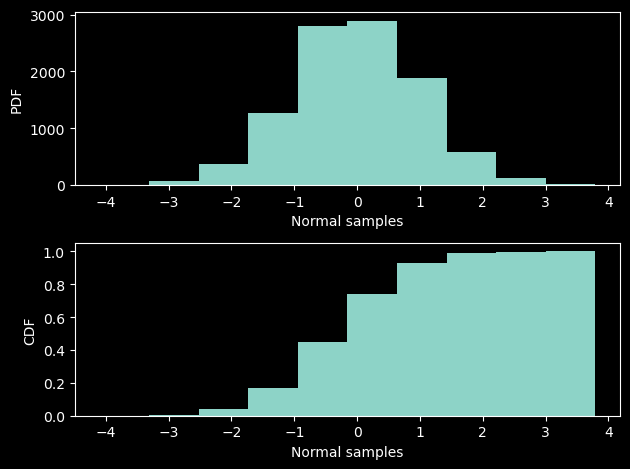

In [3]:
samples = np.random.normal(size=10000)
plt.subplot(2,1,1)
_ = plt.hist(samples)
_ = plt.xlabel('Normal samples')
_ = plt.ylabel('PDF')
plt.subplot(2,1,2)
_ = plt.hist(samples, density=True, cumulative=True)
_ = plt.xlabel('Normal samples')
_ = plt.ylabel('CDF')
plt.tight_layout()

### The Normal PDF at various standard deviations

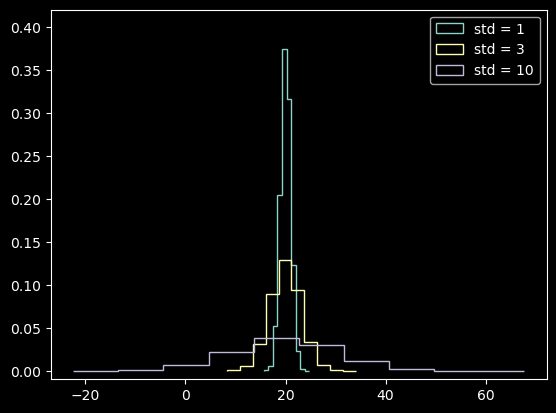

In [4]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(loc=20, scale=1, size=100000)
samples_std3 = np.random.normal(loc=20, scale=3, size=100000)
samples_std10 = np.random.normal(loc=20, scale=10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, density=True, histtype='step')
_ = plt.hist(samples_std3, density=True, histtype='step')
_ = plt.hist(samples_std10, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The Normal CDF at varios standard deviations

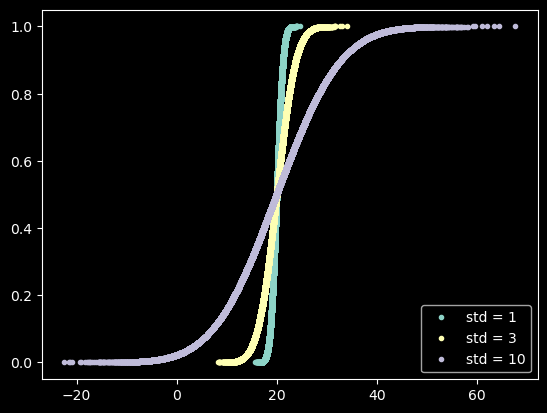

In [5]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### Michelson's speed of light

In [6]:
light = pd.read_csv('michelson_speed_of_light.zip', index_col=0)
light.info()
light.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   100 non-null    object 
 1   distinctness of image                  100 non-null    int64  
 2   temperature (F)                        100 non-null    int64  
 3   position of deflected image            100 non-null    float64
 4   position of slit                       100 non-null    float64
 5   displacement of image in divisions     100 non-null    object 
 6   difference between greatest and least  100 non-null    object 
 7   B                                      100 non-null    float64
 8   Cor                                    100 non-null    float64
 9   revolutions per second                 100 non-null    object 
 10  radius (ft)                            100 non-null    float64
 11  value o

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


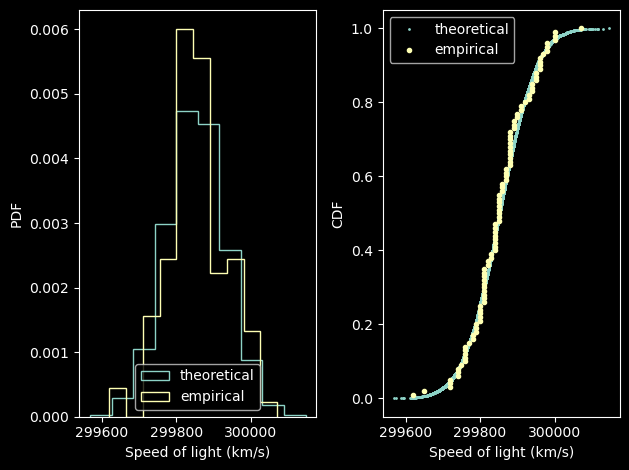

In [7]:
mu, std = light['velocity of light in air (km/s)'].aggregate({'mu': np.mean, 'std': np.std})
samples = np.random.normal(loc=mu, scale=std, size=10000)

plt.subplot(1,2,1)
plt.hist(samples, density=True, histtype='step', label='theoretical')
plt.hist(light['velocity of light in air (km/s)'], density=True, histtype='step', label='empirical')
plt.ylabel('PDF')
plt.xlabel('Speed of light (km/s)')
plt.legend()

plt.subplot(1,2,2)
x,y = ecdf(samples)
plt.plot(x, y, marker='.', linestyle='none', markersize=2, label='theoretical')
x,y = ecdf(light['velocity of light in air (km/s)'])
plt.plot(x, y, marker='.', linestyle='none', label='empirical')
plt.ylabel('CDF')
plt.xlabel('Speed of light (km/s)')
plt.legend(loc='upper left')
plt.tight_layout()

## The Exponential distribution
The waiting time between arrivals of a Poisson process is exponentially distributed.
The Exponential distribution describes the waiting times between rare events.

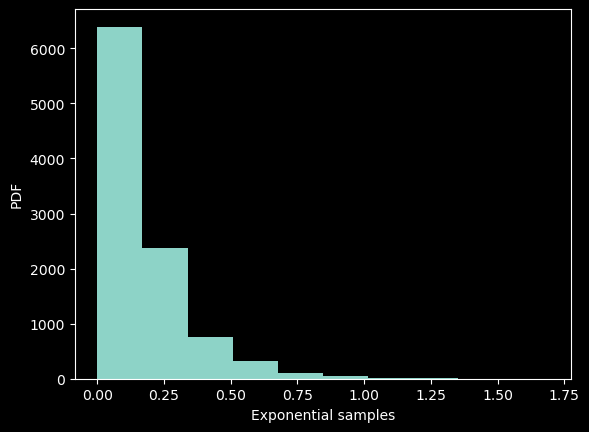

In [8]:
samples = np.random.exponential(scale=1/6, size=10000)
_ = plt.hist(samples, density=False)
_ = plt.xlabel('Exponential samples')
_ = plt.ylabel('PDF')

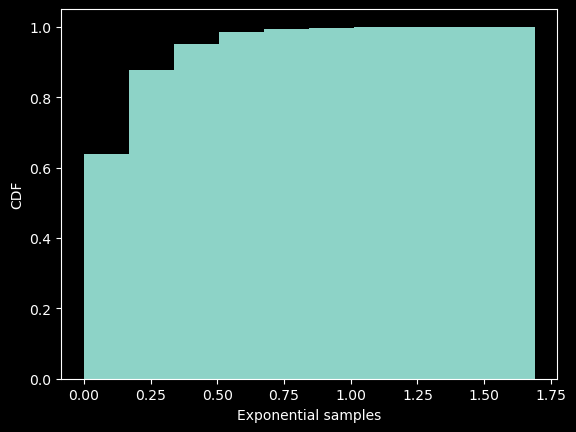

In [9]:
_ = plt.hist(samples, density=True, cumulative=True)
_ = plt.xlabel('Exponential samples')
_ = plt.ylabel('CDF')

### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. _Hitting the cycle_ is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

>**How long must we wait to see both a no-hitter and then a batter hit the cycle?**

The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the **total waiting time for the arrival of two different Poisson processes**?

The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [10]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(scale=tau1, size=size)
    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(scale=tau2, size=size)
    return t1 + t2

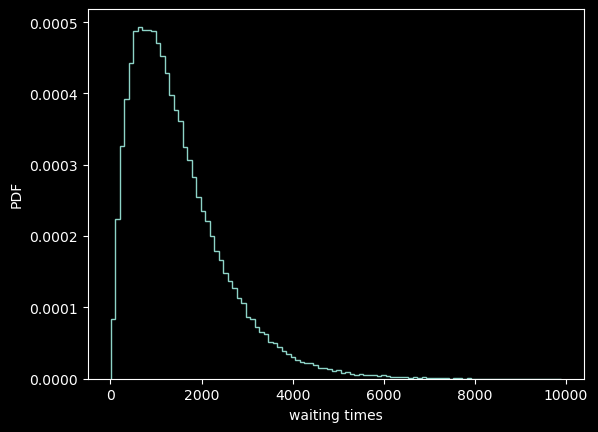

In [11]:
waiting_times = successive_poisson(764, 715, 100000)
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')
plt.xlabel('waiting times')
plt.ylabel('PDF')
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

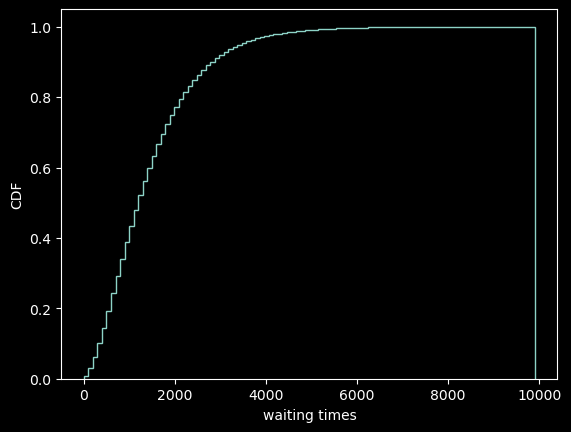

In [12]:
plt.hist(waiting_times, bins=100, density=True, cumulative=True, histtype='step')
plt.xlabel('waiting times')
plt.ylabel('CDF')
plt.show()